In [1]:
#@title Importing Packages

# Utility
import math as math
import numpy as np
import pandas as pd
import random as rdm
import scipy.io as io
import scipy.stats as stats
from google.colab import drive
import networkx as nx

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as col
from matplotlib.animation import FuncAnimation
from functools import partial

# Binomial

In [2]:
def findMode(sample):

    mode = 0
    count = 0
    for value in set(sample):
        countValue = sum([1 for num in sample if num == value])
        if countValue >= count:
            mode = value
            count = countValue
    
    return mode, count


In [3]:
#@title Function to plot pdf of distribution

def plotPDF(dist, mean, true):

    sample = dist.rvs(10000)
    plt.hist(sample, bins = int(len(sample)/100), alpha = 0.5)

    plt.scatter(mean, 0, s = 100, c = 'r', label = 'Mean')
    plt.scatter(true, 0, s = 100, c = 'g', label = 'True value')

    plt.legend()
    plt.show()



In [4]:
#@title function to plot walk of single parameter

def plotWalk(sample, true):

    plt.plot(range(len(sample)), sample)
    plt.plot([0, len(sample)], [true, true], label = 'True value')
    plt.legend()
    plt.show()

The true value of p is 0.303


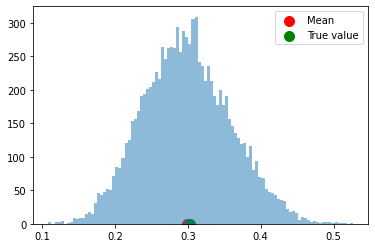

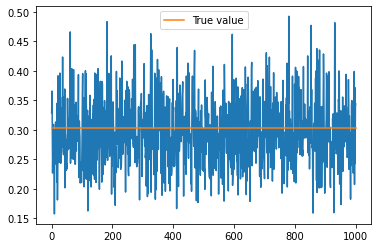

In [5]:
#@title Gibbs sampler for binomial distribution
pTrue = stats.uniform.rvs()

likelihood = stats.binom(1, pTrue)
sample = likelihood.rvs(rdm.randint(0, 100))

a = 1
b = 1

n = len(sample)
y = sum(sample)

a = a + y
b = b + n - y

prior = stats.beta(a, b)
pSample = [prior.rvs()]

for i in range(1000):

    mean = a/(a + b)
    posterior = stats.beta(a, b)
    pSample.append(posterior.rvs())

print(f"The true value of p is {format(pTrue, '.3f')}")
plotPDF(posterior, mean, pTrue)
plotWalk(pSample, pTrue)

In [6]:
stats.binom(1, pTrue).pmf(1)

0.3030200255260418

In [7]:
#@title Metropolis-Hastings for binomial - Working?
pTrue = stats.uniform.rvs()

likelihood = stats.binom(1, pTrue)
sample = likelihood.rvs(100)

a = 1 + sum(sample)
b = 1 + len(sample) - sum(sample)
ybar = np.mean(sample)

prior = stats.beta(a, b)
pSample = [prior.rvs()]

xNaught = stats.uniform(0, 1).rvs()
S = 10000
posterior = np.zeros((S,))

for t in range(S):
    posterior[t] = xNaught

    x = stats.uniform.rvs() 

    p1 = prior.pdf(x)
    p2 = prior.pdf(xNaught)

    #print(f"Values: {x}, {xNaught}")
    #print(f"p: {p1}, {p2}")

    alpha = p1/p2
    u = stats.uniform(0, 1).rvs()

    if u < alpha:
        print(f"Accepted: {t}")
        xNaught = x # accept
    #print("")


Accepted: 0
Accepted: 7
Accepted: 14
Accepted: 18
Accepted: 20
Accepted: 36
Accepted: 42
Accepted: 52
Accepted: 54
Accepted: 67
Accepted: 73
Accepted: 79
Accepted: 81
Accepted: 84
Accepted: 86
Accepted: 88
Accepted: 103
Accepted: 129
Accepted: 133
Accepted: 134
Accepted: 137
Accepted: 139
Accepted: 168
Accepted: 169
Accepted: 171
Accepted: 173
Accepted: 197
Accepted: 207
Accepted: 215
Accepted: 228
Accepted: 234
Accepted: 239
Accepted: 242
Accepted: 263
Accepted: 264
Accepted: 275
Accepted: 281
Accepted: 284
Accepted: 290
Accepted: 292
Accepted: 294
Accepted: 305
Accepted: 313
Accepted: 321
Accepted: 327
Accepted: 335
Accepted: 336
Accepted: 339
Accepted: 342
Accepted: 343
Accepted: 355
Accepted: 356
Accepted: 374
Accepted: 375
Accepted: 401
Accepted: 407
Accepted: 414
Accepted: 431
Accepted: 444
Accepted: 462
Accepted: 465
Accepted: 468
Accepted: 469
Accepted: 470
Accepted: 478
Accepted: 480
Accepted: 492
Accepted: 499
Accepted: 504
Accepted: 510
Accepted: 511
Accepted: 541
Accepted: 

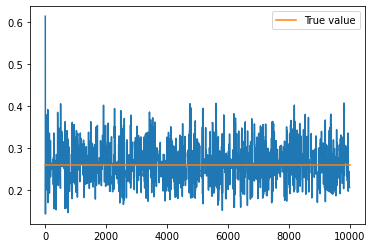

In [8]:
plotWalk(posterior, ybar)

(array([9.00e+00, 2.80e+01, 5.10e+01, 1.09e+02, 2.29e+02, 2.44e+02,
        2.91e+02, 4.50e+02, 5.69e+02, 7.51e+02, 8.56e+02, 6.03e+02,
        9.34e+02, 1.01e+03, 8.79e+02, 5.34e+02, 6.35e+02, 4.76e+02,
        3.33e+02, 2.87e+02, 2.76e+02, 1.04e+02, 1.41e+02, 6.60e+01,
        4.70e+01, 2.60e+01, 2.20e+01, 3.60e+01, 3.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([0.14362362, 0.1530312 , 0.16243878, 0.17184636, 0.18125395,
        0.19066153, 0.20006911, 0.20947669, 0.21888427, 0.22829186,
        0.23769944, 0.24710702, 0.2565146 , 0.26592219, 0.27532977,
        0.28473735, 0.29414493, 0.30355251, 0.3129601 , 0.32236768,
        0.33177526, 0.34118284, 0.35059042, 0.35999801, 0.36940559,
        0.37881317, 0.38822075, 0.39762834, 0.40703592, 0.4164435 ,
        0.42585108

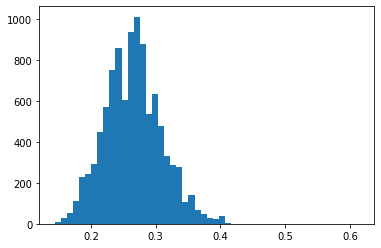

In [9]:
plt.hist(posterior, bins = 50)

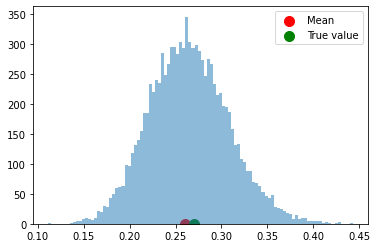

In [10]:
plotPDF(prior, ybar, pTrue)

# Normal

In [11]:
#@title Replicating R's variance function

def variance(sample):

    var = np.var(sample)*n/(n - 1)

    return var

## Gibbs Sampler

In [12]:
#@title Gibbs Sampler for normal distribution - Mu working, Sigma squared working?

# Initial sample
y = [1.64, 1.70, 1.72, 1.74, 1.82, 1.82, 1.82, 1.90, 2.08]
n = len(y) 
ybar = np.mean(y)
s2 = variance(y)

print(ybar, s2)

# Prior
mu0 = 1.9
kappa0 = 1
t20 = (mu0/stats.norm.ppf(0.975))
s20 = 0.01
nu0 = 1

print(mu0, s20)
# Initialising array
S = 10000
phi = [ybar, s2]
PHI = np.zeros((S, 2))
PHI[0, :] = phi

rdm.seed(1)
for s in range(1, S):

    mun = (mu0/t20 + n*ybar/phi[1])/(1/t20 + n/phi[1])
    t2n = 1/(1/t20 + n/phi[1])

    phi[0] = stats.norm(mun, np.sqrt(t2n)).rvs(1)

    # Sample sigmaˆ2 from its full conditional based on theta

    nun = nu0 + n
    kappan = kappa0 + n
    s2n = (nu0*s20 + (n - 1)*s2 + n*(ybar - phi[0])**2)/nun

    # This posterior distribution: inverse-gamma(nu_n/2,sigmaˆ2_n(\theta)
    phi[1] = stats.invgamma(nun/2, scale = s2n*nun/2).rvs(1)

    PHI[s, :] = phi


1.8044444444444447 0.016877777777777787
1.9 0.01


<ipython-input-12-8f4524492820>:42: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  PHI[s, :] = phi


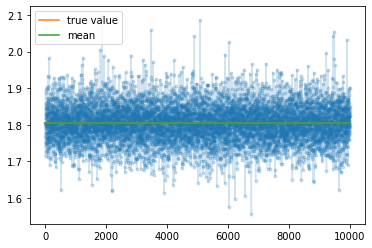

In [13]:
#@title Plotting walk of mean

plt.plot(range(10000), PHI[:, 0], '.-', alpha = 0.2)
plt.plot([0, 10000], [ybar, ybar], label = 'true value')
plt.plot([0, 10000], [np.mean(PHI[:, 0]), np.mean(PHI[:, 0])], label = 'mean')

plt.legend()

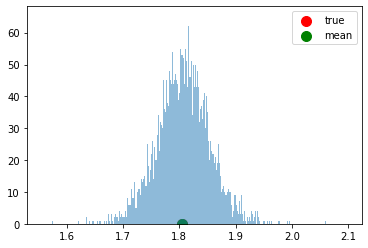

In [14]:
#@title Plotting histogram of mean

plt.hist(PHI[:, 0], bins = 1000, alpha = 0.5)
plt.scatter(ybar, 0, s = 100, c = 'r', label = 'true')
plt.scatter(np.mean(PHI[:, 0]), 0, s = 100, c = 'g', label = 'mean')

plt.legend()

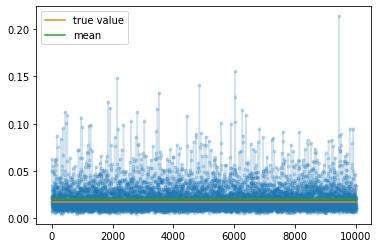

In [15]:
#@title Plotting walk of sigma-squared

plt.plot(range(10000), (PHI[:, 1]), '.-', alpha = 0.2)
plt.plot([0, 10000], [s2, s2], label = 'true value')
plt.plot([0, 10000], [np.mean(PHI[:, 1]), np.mean(PHI[:, 1])], label = 'mean')

plt.legend()

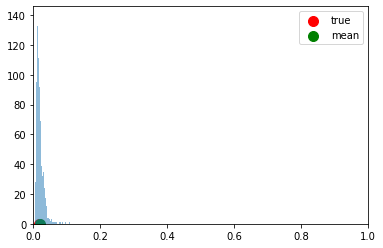

In [16]:
#@title Plotting histogram of sigma-squared

plt.hist((PHI[:, 1]), bins = 1000, alpha = 0.5)
plt.scatter(s2, 0, s = 100, c = 'r', label = 'true')
plt.scatter(np.mean((PHI[:, 1])), 0, s = 100, c = 'g', label = 'mean')
plt.xlim(0, 1)
plt.legend()

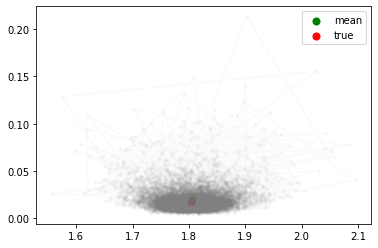

In [17]:
#@title Plotting mean vs sigma-squared

plt.scatter(np.mean(PHI[:, 0]), np.mean(PHI[:, 1]), s = 50, c = 'g', label = 'mean')
plt.plot(PHI[:, 0], PHI[:, 1], '.-', alpha = 0.04, c = 'grey')
plt.scatter(ybar, s2, s = 50, c = 'r', label = 'true')

plt.legend()

## Metropolis-hastings

In [18]:
#@title Metropolis-Hastings for normal - Mu working, sigma-squared working?

# Intiialising likelihood distribution
muL = stats.uniform(1, 7).rvs()
s2L = stats.uniform(0, 0.1).rvs()
likelihood = stats.norm(muL, np.sqrt(s2L))

# Initialising sample
sample = likelihood.rvs(5)
n = len(sample)
ybar = np.mean(sample)
s2 = variance(sample)

print(ybar, s2)

# Initialising prior values
mu0 = stats.uniform(1, 7).rvs()
kappa0 = 1
t20 = (mu0/stats.norm.ppf(0.975))
s20 = 0.01
nu0 = 1

S = 10000
phi = [ybar, s2]

PHI = np.zeros((S, 2))
PHI[0, :] = [mu0, s20]

for t in range(S):
    sample = likelihood.rvs(int(stats.uniform(50, 100).rvs()))
    n = len(sample)
    ybar = np.mean(sample)
    s2 = variance(sample)

  # Get starting probabilities for prior values of mu and sigma
    # Mu
    
    mun = (mu0/t20 + n*ybar/phi[1])/(1/t20 + n/phi[1])
    t2n = 1/(1/t20 + n/phi[1])
    pPriorMu = stats.norm(mun, np.sqrt(t2n)).pdf(mu0)

    # Sigma
    nun = nu0 + n
    kappan = kappa0 + n
    s2n = (nu0*s20 + (n - 1)*s2 + n*(ybar - phi[0])**2)/nun
    pPriorS2 = stats.invgamma(nun/2, scale = s2n*nun/2).pdf(s20)

    # Candidates
    # Candidate for mu
    mu = stats.norm(mu0).rvs() # candidate
    sigma2 = stats.norm(s20).rvs()

    pCandidateMu = stats.norm(mun, np.sqrt(t2n)).pdf(mu)
    #print("Mu:")
    #print("Values: ", mu0, mu)
    #print("Probabilities: ", pCandidateMu, pPriorMu)
    
    alpha = pCandidateMu/pPriorMu
    u = stats.uniform(0, 1).rvs() # random uniform

    if u < alpha:
        mu0 = mu # accept

    #print("")

    # Candidate for sigma-squared

    pCandidateS2 = stats.invgamma(nun/2, scale = s2n*nun/2).pdf(sigma2)
    #print("Sigma-Squared:")
    #print("Values: ", s20, sigma2)
    #print("Probabilities: ", pCandidateS2, pPriorS2)
    
    beta = pCandidateS2/pPriorS2 # ratio
    u = stats.uniform(0, 1).rvs() # random uniform

    if u < beta:
        s20 = sigma2 # accept

    #print("")

    PHI[t, :] = [mu0, s20]
    #print("")

6.684726581297217 0.22912463634819139


<ipython-input-18-020da74459f1>:58: RuntimeWarning: invalid value encountered in double_scalars
  alpha = pCandidateMu/pPriorMu
<ipython-input-18-020da74459f1>:73: RuntimeWarning: invalid value encountered in double_scalars
  beta = pCandidateS2/pPriorS2 # ratio
<ipython-input-18-020da74459f1>:73: RuntimeWarning: divide by zero encountered in double_scalars
  beta = pCandidateS2/pPriorS2 # ratio
<ipython-input-18-020da74459f1>:58: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = pCandidateMu/pPriorMu


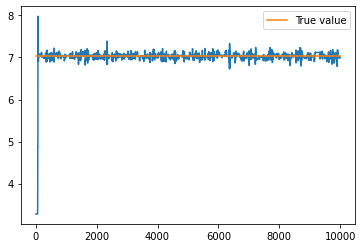

In [19]:
#@title Plotting walk of Mean

plotWalk(PHI[:, 0], ybar)

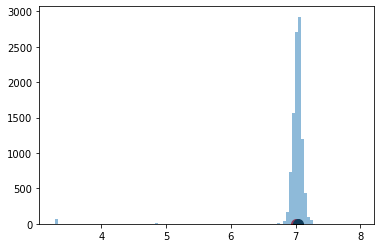

In [20]:
#@title Plotting histogram of mean samples

plt.hist(PHI[:, 0], bins = 100, alpha = 0.5)
plt.scatter(np.mean(PHI[:,0]), 0, s = 100, c = 'r')
plt.scatter(muL, 0, s = 100, c = 'k')

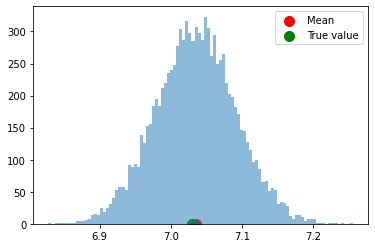

In [21]:
#@title Plotting pdf of mean posterior

plotPDF(stats.norm(mun, np.sqrt(t2n)), ybar, muL)

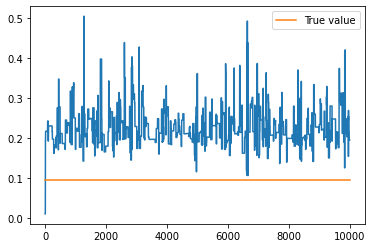

In [22]:
#@title Plotting walk of sigma-squared

plotWalk(PHI[:, 1], s2L)

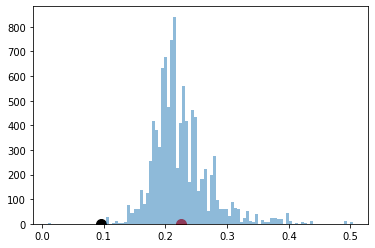

In [23]:
#@title Plotting histogram of sigma-squared samples

plt.hist(PHI[:, 1], bins = 100, alpha = 0.5)
plt.scatter(np.mean(PHI[:,1]), 0, s = 100, c = 'r')
plt.scatter(s2L, 0, s = 100, c = 'k')

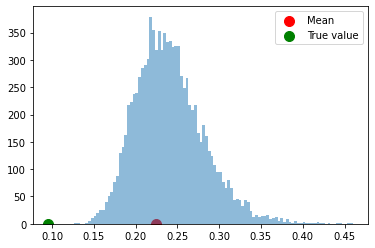

In [24]:
#@title Plotting pdf of sigma-squared posterior

plotPDF(stats.invgamma(nun/2, scale =  nun*s2n/2), np.mean(PHI[:,1]), s2L)

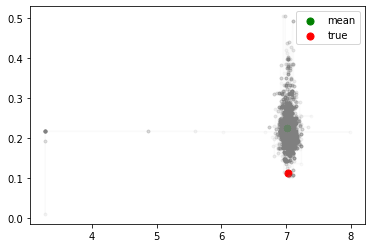

In [25]:
#@title Plotting mean vs sigma-squared

plt.scatter(np.mean(PHI[:, 0]), np.mean(PHI[:, 1]), s = 50, c = 'g', label = 'mean')
plt.plot(PHI[:, 0], PHI[:, 1], '.-', alpha = 0.04, c = 'grey')
plt.scatter(ybar, s2, s = 50, c = 'r', label = 'true')

plt.legend()

# Toy example for algae bloom

In [26]:
drive.mount('drive')

pmatRaw = pd.read_csv("https://drive.google.com/uc?export=download&id=18qzQ-2TRETglAGLSXRZekyQqK7QxXUff")
pmat = pmatRaw.copy()
pmat = pmat.set_index('Unnamed: 0')

Mounted at drive


In [27]:
def findMNew(M, i, t, A, Alpha, Beta, StartBloom, S, pmat):

  start = S*StartBloom
  growth = Alpha*A*M[i]
  transport = Beta*sum(pmat.iloc[i, :]*M)
  MNew = start + growth + transport

  return MNew

In [129]:
def runSimulation(sites, length, pmat):

    Alpha = 3
    Beta = 0.5

    N =  1
    A = np.zeros((length, sites))

    for n in range(N):
        i = int(stats.uniform.rvs(0, sites))
        T = int(stats.uniform.rvs(0, length))
        W = int(stats.nbinom.rvs(6, 0.75))

        A[range(T, (min(T + W, length))), i] = 1

    S = np.zeros(sites)
    M = np.zeros(sites)
    MArray = np.zeros((sites, length))

    #print(f"Alpha: {Alpha}")
    #print(f"Beta: {Beta}")
    #print(f"T: {T}")
    #print(f"W: {W}")

    for t in range(length):
      for i in range(sites):

        if A[t, i] - A[max(t - 1, 0), i] == 1:
          StartBloom = 1
          #print(f"Week {t} - Bloom started at site {i}")
          S[i] = stats.gamma.rvs(1, 1)
          #print(f"S = {S[i]}")
        else:
          StartBloom = 0

        M[i] = findMNew(M, i, t, A[t, i], Alpha, Beta, StartBloom, S[i], pmat.iloc[:sites, :sites])
        MArray[i, t] = M[i]

    return MArray

In [45]:
#@title Runs simulation with given parameters

def getSample(sites, length, pmat, alpha, beta, T, W, Size, error):


    A = np.zeros((length, sites))
    A[range(T, (min(T + W, length))), 0] = 1

    S = np.zeros(sites)
    M = np.zeros(sites)
    MArray = np.zeros((sites, length))

    print(f"Alpha: {alpha}")
    print(f"Beta: {beta}")
    print(f"T: {T}")
    print(f"W: {W}")

    for t in range(length):
      for i in range(sites):

        if A[t, i] - A[max(t - 1, 0), i] == 1:
          StartBloom = 1
          print(f"Week {t} - Bloom started at site {i}")
          S[i] = Size
          print(f"S = {S[i]}")
        else:
          StartBloom = 0

        M[i] = findMNew(M, i, t, A[t, i], alpha, beta, StartBloom, S[i], pmat.iloc[:sites, :sites])
        M[i] = M[i] + stats.norm(0, error).rvs()
        MArray[i, t] = M[i]

    return MArray

Alpha: 3
Beta: 0.5
T: 10
W: 5
Week 10 - Bloom started at site 0
S = 0.1


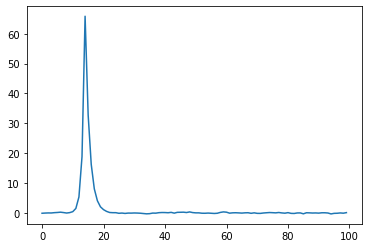

In [52]:
plt.plot(range(100), getSample(1, 100, pmat, 3, 0.5, 10, 5, .1, 0.1)[0])

alpha = growth parameter
beta = decay parameter
S = Size parameter
T  = Start time parameter
W = Length of time parameter


In [ ]:
bigArr = []
for s in range(1000):
    arr = runSimulation(1, 100, pmat)
    bigArr.append(arr)

bigArrValue = 0
bigArrMean = np.zeros((100,))
for i in range(100):
    for s in range(1000):
        arr = bigArr[s][0]
        bigArrValue += arr[i]
    bigArrMean[i] = bigArrValue/1000

In [69]:
np.zeros(100)[-]

0.0

In [135]:
#@title Building likelihood calculator

def likelihood(yArray, sites, length, pmat, MArray, alpha, beta, AArray, VArray, SArray, error, delta):


    pVal = 0

    for i in range(sites):

      sumVal = 0

      for t in range(length):

          alphaVal = 0
          betaVal = 0

          if t > 0:
            alphaVal = AArray[i, t]*alpha*MArray[i, t - 1]
            for j in range(sites):
                betaVal += MArray[j, t - 1]*pmat.iloc[i, j]

          sumVal += (np.log(yArray[i, t]) - (np.log(delta + alphaVal + beta*betaVal + SArray[i, t])/VArray[i]))**2
      
      pVal = (np.e)**((-1/2*error)*sumVal)
      pVal = pVal*((2*(np.pi)*error)**(-length/2))

      print(pVal)


In [145]:
#@ Testing likelihoods

delta = 0.00001
for i in range(100):
  newSample = runSimulation(1, 100, pmat)
  likelihood(newSample + delta, 1, 100, pmat, sample, 3, 0.5, A0, [1], Size0, 0.1, delta)

2.797190476519285e-72
1.1282478094628908e-103
1.7461197167502706e-57
1.1543325358382497e-18
2.717952006914955e-25
1.1543325358382497e-18
3.665896036508183e-70
5.256541807968157e-38
2.1657930140590283e-214
1.1543325358382497e-18
9.704436108237242e-46
1.1543325358382497e-18
1.5424160965923746e-60
1.649913111177852e-19
1.2422868335100092e-21
2.3920042036678722e-42
5.7785750749730735e-71
2.8401782394690133e-38
1.1543325358382497e-18
6.82358206594691e-31
1.1543325358382497e-18
3.125563729673339e-70
3.3638273699841927e-28
6.426716808320937e-55
4.964657521609223e-44
3.1530731764434343e-73
3.1375259625428294e-32
1.0481250985995239e-45
1.128117976251331e-69
1.1543325358382497e-18
7.385385014573343e-123
1.1543325358382497e-18
1.1543325358382497e-18
9.863269029471375e-37
3.2568890443663746e-41
6.644098642793085e-36
4.800981150985776e-49
7.543037303365436e-47
2.439175020461243e-34
1.2949754894908808e-06
1.1543325358382497e-18
2.254208633092268e-40
2.671202159378763e-59
9.038701934769497e-43
5.0292

In [68]:
#@title MH sampler - Not even close

sites = 1
length = 100

sample = runSimulation(sites, length, pmat)

n = len(sample)
ysum = sum(sample[0, :])
ybar = np.mean(sample)
s2 = variance(sample)

# Prior parameters
alphaA0 = 1
alphaB0 = 1
alphaPrior = stats.gamma(alphaA0, alphaB0)
alpha0 = alphaPrior.rvs()

betaA0 = 1
betaB0 = 1
betaPrior = stats.beta(betaA0, betaB0)
beta0 = betaPrior.rvs()

TA0 = 0
TB0 = 100
TPrior = stats.uniform(TA0, TB0)
T0 = int(TPrior.rvs())

WA0 = 6
WB0 = 0.75
WPrior = stats.nbinom(WA0, WB0)
W0 = int(WPrior.rvs())

SA0 = 1
SB0 = 1
SPrior = stats.gamma(SA0, SB0)
S0 = SPrior.rvs()


phi = [alpha0, beta0, T0, W0, S0]
S = 10000
PHI = np.zeros((10000, len(phi)))
PHI[0, :] = phi

alphaArray = np.zeros((10000,))
alphaArray[0] = alpha0

for s in range(1, S):
    
    # Defining piecewise components
      # A
    A0 = np.zeros((sites, length))
    for i in range(sites):
        A0[i, range(T0, (min(T0 + W0, length)))] = 1

      # S
    Size0 = np.zeros((sites, length))
    for i in range(sites):
        Size0[i, T0] = S0

Alpha: 3
Beta: 0.5
T: 1
W: 2
Week 1 - Bloom started at site 0
S = 1.5815392519494362


<ipython-input-11-12c36cac901d>:5: RuntimeWarning: divide by zero encountered in double_scalars
  var = np.var(sample)*n/(n - 1)


In [ ]:
plotPDF(stats.gamma(np.argmax(sample) - max([i for i in range(100) if sample[0][i] == 0]), np.argmax(sample)), 1, 1)

In [106]:
A0

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [108]:
Size0

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.61496832, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  